## Aim:
Real-time Twitter Sentiment Analysis using twitter API

### API:
API stands for Application Programming Interface. In the context of APIs, the word Application refers to any software with a distinct function. APIs are mechanisms that enable two software components to communicate with each other using a set of definitions and protocols. Interface can be thought of as a contract of service between two applications. This contract defines how the two communicate with each other using requests and responses.   
For example:  
The weather bureau’s software system contains daily weather data. The weather app on your phone “talks” to this system via APIs and shows you daily weather updates on your phone. 

### Fetching tweets using Twitter API and `requests` library

In [89]:
import requests

bearer_token = "AAAAAAAAAAAAAAAAAAAAAHSajQEAAAAALcKLEZyH12fUIIwq2SvkfBkNRMY%3DVLdpUjiEJVT9KO72jLROI9NIIrG0mVoTCnlokj4mOmdDCOMVuy"

# Set the URL for the search endpoint
url = "https://api.twitter.com/2/tweets/search/recent"

# Set the parameters for the search query
params = {
    "query": "#news",
    "max_results": 100
}

# Set the authorization header
headers = {
    "Authorization": f"Bearer {bearer_token}"
}

# Send the request to the Twitter API
response = requests.get(url, headers=headers, params=params)

# Putting all the tweets in a list:
tweets=[]
for tweet in response.json()["data"]:
    tweets.append(tweet['text'])

print(len(tweets), '\n')

100 



In [90]:
import pandas as pd
df = pd.DataFrame(tweets, columns=['Tweets'])

In [91]:
df

,Tweets
0,@darren_stallcup @joerogan @BBC @NPR @VICE @Bu...
1,T.J. Holmes Files For Divorce From Wife Marile...
2,@usbreakingnew10 \n #news #breaking #today
3,Steve Harvey &amp; Atty. Ricky Anderson stole ...
4,RT @massmaru_mbs: 2022年ラストは…\n#ジャにのちゃんねる に出られな...
...,...
95,RT @DavidKevinDw3: ☎️ #News 📲\n\nAfter two yea...
96,RT @massmaru_mbs: 2022年ラストは…\n#ジャにのちゃんねる に出られな...
97,ドローンで江南盛り上げ 高３カメラマン・小沢さんがＰＲ大使に ... https://t.c...
98,RT @massmaru_mbs: 2022年ラストは…\n#ジャにのちゃんねる に出られな...


In [92]:
import re

def cleantext(text):
    text= re.sub(r'@[A-Za-z0-9]+','',text) 
    text= re.sub(r'#',' ',text) 
    text= re.sub(r'RT[\s]+','',text) 
    text= re.sub(r'https?:\/\/\S+','',text) 
    return text 
 
df['Tweets'] = df["Tweets"].apply(cleantext)
df

,Tweets
0,_stallcup Is getting cold in SanFrancisc...
1,T.J. Holmes Files For Divorce From Wife Marile...
2,\n news breaking today
3,Steve Harvey &amp; Atty. Ricky Anderson stole ...
4,_mbs: 2022年ラストは…\n ジャにのちゃんねる に出られなかった増田さんは中丸さん...
...,...
95,: ☎️ News 📲\n\nAfter two years long manmade s...
96,_mbs: 2022年ラストは…\n ジャにのちゃんねる に出られなかった増田さんは中丸さん...
97,ドローンで江南盛り上げ 高３カメラマン・小沢さんがＰＲ大使に ... ドローン Dro...
98,_mbs: 2022年ラストは…\n ジャにのちゃんねる に出られなかった増田さんは中丸さん...


### TextBlob
> TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

#### Features

    Noun phrase extraction
    Part-of-speech tagging
    Sentiment analysis
    Classification (Naive Bayes, Decision Tree)
    Tokenization (splitting text into words and sentences)
    Word and phrase frequencies
    Parsing
    n-grams
    Word inflection (pluralization and singularization) and lemmatization
    Spelling correction
    Add new models or languages through extensions
    WordNet integration


In [94]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 

def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

df["Subjectivity"]=df["Tweets"].apply(getSubjectivity) 
df["Polarity"]=df["Tweets"].apply(getPolarity) 
df 

,Tweets,Subjectivity,Polarity
0,_stallcup Is getting cold in SanFrancisc...,0.8,0.00
1,T.J. Holmes Files For Divorce From Wife Marile...,0.0,0.00
2,\n news breaking today,0.0,0.00
3,Steve Harvey &amp; Atty. Ricky Anderson stole ...,0.0,0.00
4,_mbs: 2022年ラストは…\n ジャにのちゃんねる に出られなかった増田さんは中丸さん...,0.0,0.00
...,...,...,...
95,: ☎️ News 📲\n\nAfter two years long manmade s...,0.4,-0.05
96,_mbs: 2022年ラストは…\n ジャにのちゃんねる に出られなかった増田さんは中丸さん...,0.0,0.00
97,ドローンで江南盛り上げ 高３カメラマン・小沢さんがＰＲ大使に ... ドローン Dro...,0.0,0.00
98,_mbs: 2022年ラストは…\n ジャにのちゃんねる に出られなかった増田さんは中丸さん...,0.0,0.00


In [95]:
def getAnalysis(score): 
    if score<0: 
        return "Negative" 
    elif score==0: 
        return "Neutral"
    else: 
        return "Positive"
    
df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,_stallcup Is getting cold in SanFrancisc...,0.8,0.00,Neutral
1,T.J. Holmes Files For Divorce From Wife Marile...,0.0,0.00,Neutral
2,\n news breaking today,0.0,0.00,Neutral
3,Steve Harvey &amp; Atty. Ricky Anderson stole ...,0.0,0.00,Neutral
4,_mbs: 2022年ラストは…\n ジャにのちゃんねる に出られなかった増田さんは中丸さん...,0.0,0.00,Neutral
...,...,...,...,...
95,: ☎️ News 📲\n\nAfter two years long manmade s...,0.4,-0.05,Negative
96,_mbs: 2022年ラストは…\n ジャにのちゃんねる に出られなかった増田さんは中丸さん...,0.0,0.00,Neutral
97,ドローンで江南盛り上げ 高３カメラマン・小沢さんがＰＲ大使に ... ドローン Dro...,0.0,0.00,Neutral
98,_mbs: 2022年ラストは…\n ジャにのちゃんねる に出られなかった増田さんは中丸さん...,0.0,0.00,Neutral


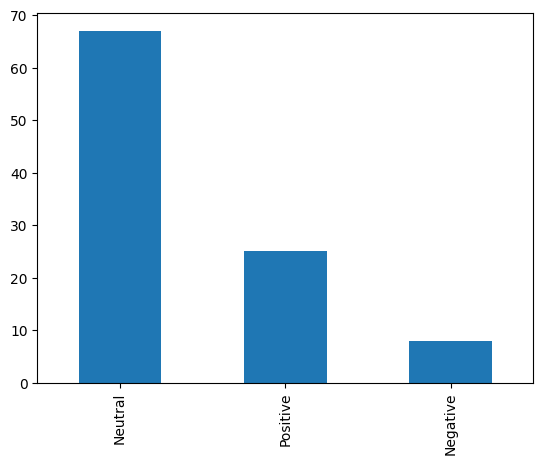

In [96]:
import matplotlib. pyplot as plt
df['Analysis'].value_counts().plot(kind='bar') 
plt.show() 